<a href="https://colab.research.google.com/github/CakeNuthep/histogram-equalizer/blob/master/HE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Thank you source code from https://github.com/torywalker/histogram-equalizer

In [28]:
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('/content/lung.jpg')

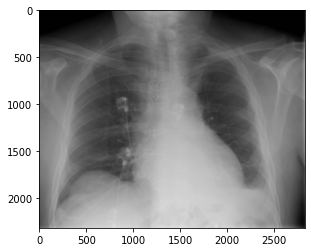

In [29]:
plt.imshow(img, cmap='gray')

In [30]:
# convert image into a numpy array
img = np.asarray(img)

(array([3.16000e+02, 2.36607e+05, 5.63100e+03, 5.98300e+03, 6.20700e+03,
        6.17900e+03, 6.53000e+03, 6.60000e+03, 6.88300e+03, 6.78300e+03,
        0.00000e+00, 6.99700e+03, 7.17000e+03, 7.20800e+03, 7.08600e+03,
        7.16900e+03, 7.45000e+03, 7.77900e+03, 7.78500e+03, 7.98800e+03,
        0.00000e+00, 8.18900e+03, 8.27400e+03, 8.33700e+03, 8.40500e+03,
        8.57800e+03, 8.26500e+03, 7.90600e+03, 8.02300e+03, 8.22000e+03,
        0.00000e+00, 7.84100e+03, 8.57900e+03, 8.13000e+03, 8.36400e+03,
        9.13800e+03, 8.90400e+03, 9.77800e+03, 1.08050e+04, 1.07450e+04,
        0.00000e+00, 1.03870e+04, 1.04570e+04, 1.01560e+04, 1.14900e+04,
        1.17220e+04, 1.40790e+04, 1.62290e+04, 1.92020e+04, 2.18930e+04,
        2.59370e+04, 0.00000e+00, 2.92070e+04, 3.10460e+04, 3.31550e+04,
        3.55210e+04, 3.78150e+04, 3.73220e+04, 3.94850e+04, 3.87260e+04,
        3.90110e+04, 0.00000e+00, 3.75980e+04, 3.93400e+04, 4.38390e+04,
        4.55920e+04, 4.95190e+04, 5.07270e+04, 4.82

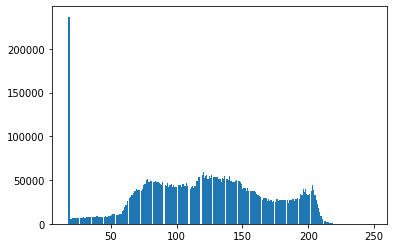

In [31]:
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=256)

<BarContainer object of 256 artists>

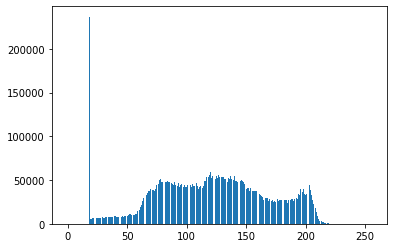

In [32]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.bar(range(len(hist)),hist)

In [33]:
display(Math(r'cdf(i) = \sum_{j=0}^{i} h(j)'))

<IPython.core.display.Math object>

<BarContainer object of 256 artists>

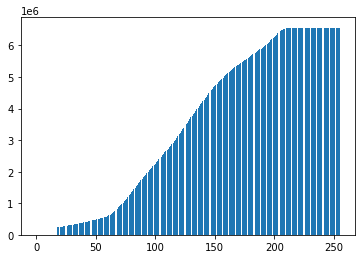

In [41]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
# plt.plot(cs)
plt.bar(range(len(cs)),cs)

In [35]:
display(Math(r'h(v) = round({\frac{cdf(v)-cdf_{min}}{(M \times N)-cdf_{min}}} \times (L-1))'))

<IPython.core.display.Math object>

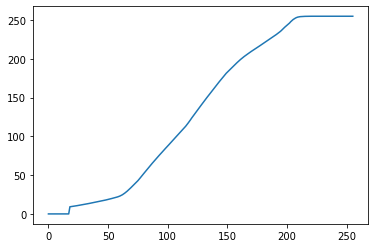

In [36]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

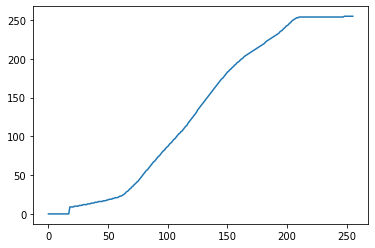

In [37]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

(array([3.16000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.54428e+05,
        2.61920e+04, 2.09500e+04, 2.89130e+04, 2.35520e+04, 2.48000e+04,
        2.52480e+04, 3.19900e+04, 2.50730e+04, 1.80420e+04, 3.13280e+04,
        2.08440e+04, 3.33680e+04, 1.40790e+04, 3.54310e+04, 2.18930e+04,
        2.59370e+04, 2.92070e+04, 0.00000e+00, 3.10460e+04, 3.31550e+04,
        3.55210e+04, 0.00000e+00, 3.78150e+04, 3.73220e+04, 0.00000e+00,
        3.94850e+04, 3.87260e+04, 0.00000e+00, 3.90110e+04, 3.75980e+04,
        0.00000e+00, 3.93400e+04, 4.38390e+04, 0.00000e+00, 4.55920e+04,
        0.00000e+00, 4.95190e+04, 0.00000e+00, 5.07270e+04, 0.00000e+00,
        4.82740e+04, 0.00000e+00, 4.76940e+04, 0.00000e+00, 4.83370e+04,
        0.00000e+00, 4.79900e+04, 4.83180e+04, 0.00000e+00, 4.91660e+04,
        0.00000e+00, 4.74070e+04, 0.00000e+00, 4.72050e+04, 0.00000e+00,
        4.65130e+04, 0.00000e+00, 4.58560e+04, 4.41

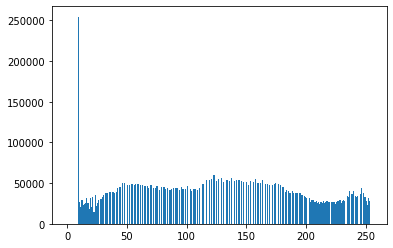

In [38]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=256)

In [39]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
img_new

array([[  9,   9,   9, ...,  14,  15,  16],
       [  9,   9,   9, ...,  14,  15,  16],
       [  9,   9,   9, ...,  14,  15,  16],
       ...,
       [ 96,  94,  97, ...,  19,  19,  21],
       [ 97,  96, 101, ...,  20,  20,  21],
       [ 99,  99, 101, ...,  21,  20,  21]], dtype=uint8)

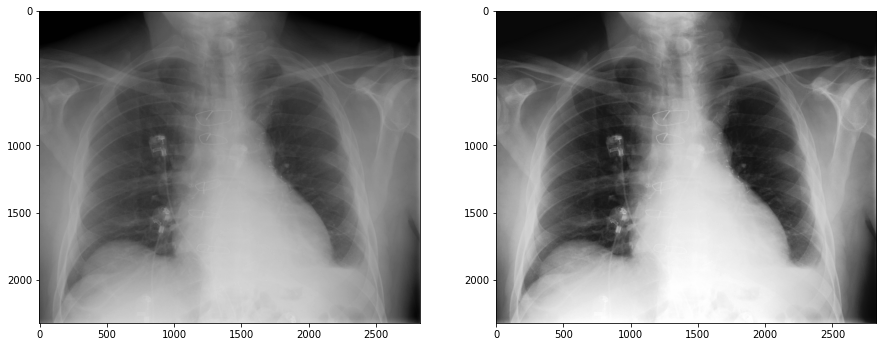

In [40]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)